<a href="https://colab.research.google.com/github/Shivesh2001/placement/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics
import sklearn.preprocessing
import sklearn.linear_model 
from sklearn.model_selection import train_test_split

# Importing Dataset

In [ ]:
col_names = ["X1" , "X2", "Y"]
dataset = pd.read_csv("/content/PLA Data.csv - PLA Data.csv.csv", names = col_names)
dataset.head()

,X1,X2,Y
0,3.680764,9.727820,1
1,0.355351,4.784687,2
2,1.337683,4.844018,1
3,0.053573,4.535388,2
4,3.248843,9.027739,1


In [ ]:
dataset.Y = dataset.Y.apply(lambda x: str(x)).map({"1": 0, "2": 1})
dataset.head()

,X1,X2,Y
0,3.680764,9.727820,0
1,0.355351,4.784687,1
2,1.337683,4.844018,0
3,0.053573,4.535388,1
4,3.248843,9.027739,0


# Count plot of different classes both are equally distributed

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


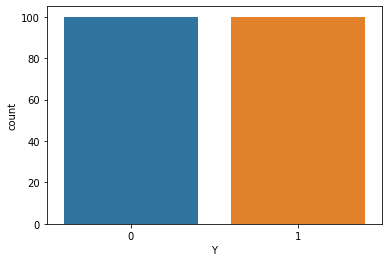

In [ ]:
sns.countplot(dataset.Y)

# Scatterplot of both classes

These points are linearly separable

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


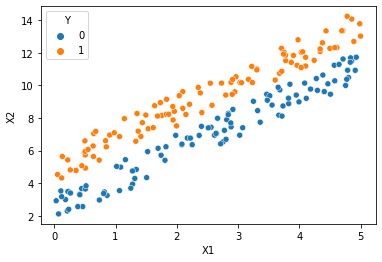

In [ ]:
sns.scatterplot(dataset.X1, dataset.X2, hue = dataset.Y)

# Logistic Regression from scratch 

activation function is the sigmoid function

we have set threshold to 0.5 you can play with the threshold to get a better result.

learning rate = 0.01 you can also play with it to get a robust modle.



In [ ]:
class Logistic_Regression:
  def __init__(self, iteration, learning_rate, threshold = 0.5):
    self.iterations = iteration 
    self.lr = learning_rate
    self.theta = None
    self.threshold = threshold
  def activation_function(self, Z):
    return 1/(1 + np.exp(-Z))
  def predict(self, X):
    out = np.dot(X, self.theta)
    prediction = self.activation_function(out)
    return np.where(prediction >= self.threshold, 1,0)
  def fit(self, X, Y):
    self.m, self.n = X.shape
    self.theta = np.zeros(self.n)
    self.X = X
    self.Y = Y
    for _ in range(self.iterations):
      self.gradient_ascent()
    return self
  def gradient_ascent(self):
    Y_pred = self.predict(self.X)
    dtheta = (1/self.m)*np.dot(self.X.T, self.Y - Y_pred)
    self.theta += self.lr * dtheta
    return self

# Scaling and Spliting the dataset

scaling is crucial for classification model.

we are training the model on 160 examples.



In [ ]:
X = dataset.iloc[:, :-1].values
X = np.column_stack((X,np.ones(X.shape[0])))
print(X.shape)
ss = sklearn.preprocessing.StandardScaler()
X = ss.fit_transform(X)
Y = dataset.iloc[:,-1].values
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)
model = Logistic_Regression(10, 0.01, threshold = 0.5)
model.fit(x_train, y_train)

(200, 3)


# Accuracy on Test set

 since the dataset was linearly separable getting 100% accuracy is no-brainer. But when your dataset is not linearly separable the accuracy rate will go down.

In [ ]:
y_pred = model.predict(x_test)
print("accuracy:- ",sklearn.metrics.accuracy_score(y_test,y_pred))

accuracy:-  1.0


# Confusion Matrix 

Accuracy is not a good metric to judge your classification model. We use confusion matrix to judge the performance of our model.

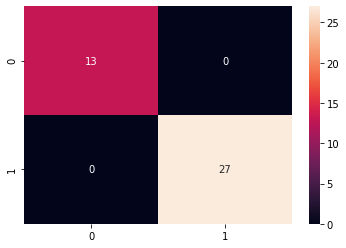

In [ ]:
conf_matrix = sklearn.metrics.confusion_matrix(y_test, y_pred)
#labels = ['True Neg','False Pos','False Neg','True Pos']
#labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_matrix, annot = True)

# Logistic regression using sklearn.

In [ ]:
from sklearn.linear_model import LogisticRegression
model_sklearn = LogisticRegression()
model_sklearn.fit(x_train, y_train)
y_pred_sklearn = model_sklearn.predict(x_test)
print("accuracy:- ",sklearn.metrics.accuracy_score(y_test,y_pred_sklearn))


accuracy:-  1.0


# Confusion matrix of sklearn model

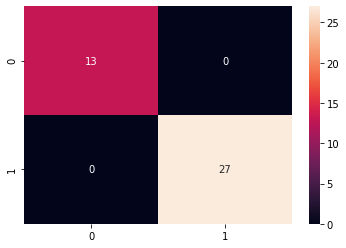

In [ ]:
conf_matrix_sklearn = sklearn.metrics.confusion_matrix(y_test, y_pred_sklearn)
#labels = ['True Neg','False Pos','False Neg','True Pos']
#labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_matrix_sklearn, annot = True)